## Federal University of Bahia (UFBA)

### Department of Electrical and Computer Engineering

### Course: ENGG69 - Deep Learning

### Professor: Eduardo Simas

### Students: Gabriel Correia and Márcio Barros

---


## Perceptron Model Training Rule:

1. In a Python notebook, implement the Perceptron model and its training rule.

2. With the routines created, train the Perceptron to map the OR and AND problems; plot the error curves and the decision boundary generated in each case.

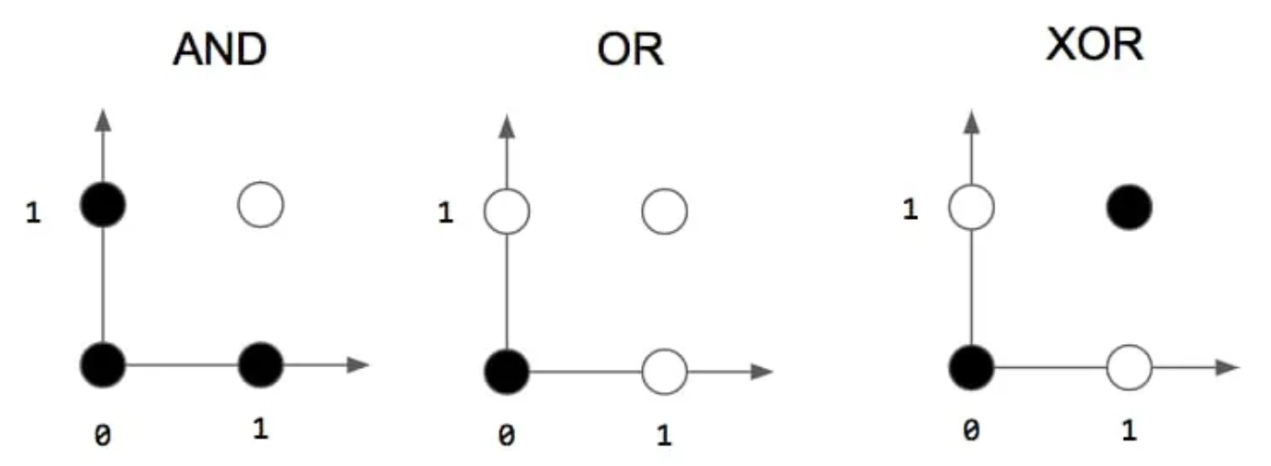

---

## Importing the Libraries

---

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Perceptron Model Training Rule

---

SIMPLE PERCEPTRON MODEL WITH ITS TRAINING RULE



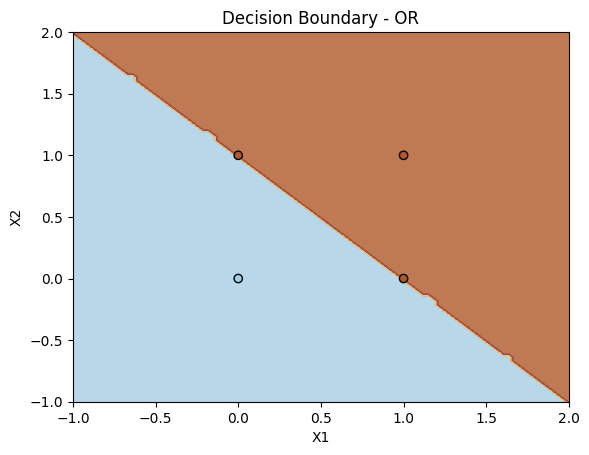

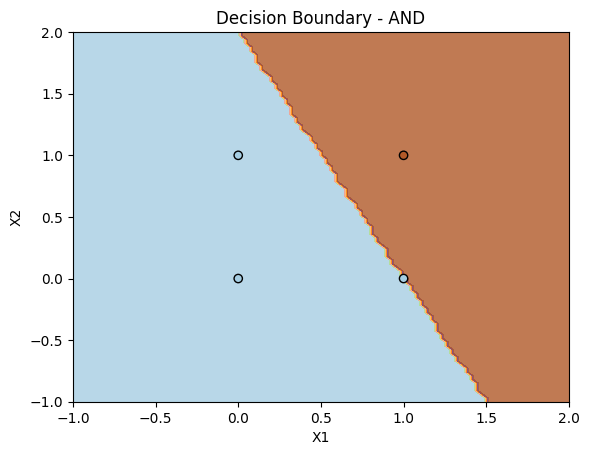

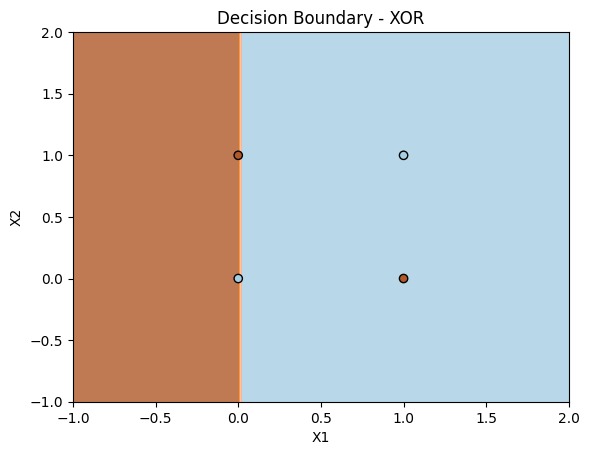

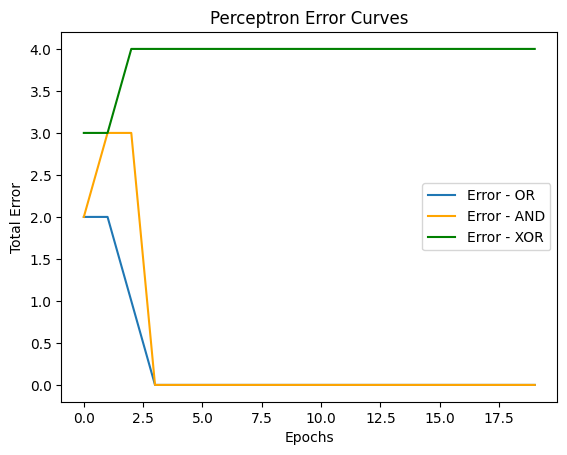

In [ ]:
# Perceptron Model Training Rule

print('SIMPLE PERCEPTRON MODEL WITH ITS TRAINING RULE')
print('')

class Perceptron:
    def __init__(self, input_size, learning_rate=0.1, epochs=100):
        # Initialize weights, including bias
        self.weights = np.zeros(input_size + 1)  # +1 for bias term
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.errors = []  # List to store the total error per epoch

    def activation(self, x):
        # Activation function: returns 1 if x >= 0, else returns 0
        return 1 if x >= 0 else 0

    def predict(self, X):
        # Predicts the output for a given input X
        return self.activation(np.dot(X, self.weights[1:]) + self.weights[0])

    def fit(self, X, y):
        # Training function to fit the model to the data
        self.errors = []
        for _ in range(self.epochs):
            total_error = 0
            # Iterating over each training sample
            for xi, target in zip(X, y):
                prediction = self.predict(xi)
                error = target - prediction
                # Update the weights and bias
                self.weights[1:] += self.learning_rate * error * xi
                self.weights[0] += self.learning_rate * error  # Update the bias
                total_error += abs(error)  # Accumulate the total error
            self.errors.append(total_error)  # Store total error for the epoch

# Function to plot the decision boundary
def plot_decision_boundary(perceptron, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Predict the output for all points in the meshgrid
    Z = np.array([perceptron.predict(np.array([x, y])) for x, y in zip(xx.ravel(), yy.ravel())])
    Z = Z.reshape(xx.shape)  # Reshape the result to match the grid shape

    # Plot the decision boundary and the data points
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.title(title)
    plt.xlabel('X1')  # Label for the first feature
    plt.ylabel('X2')  # Label for the second feature
    plt.show()

# Logical problem data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

# OR Problem
y_or = np.array([0, 1, 1, 1])
perceptron_or = Perceptron(input_size=2, learning_rate=0.1, epochs=20)
perceptron_or.fit(X, y_or)

# AND Problem
y_and = np.array([0, 0, 0, 1])
perceptron_and = Perceptron(input_size=2, learning_rate=0.1, epochs=20)
perceptron_and.fit(X, y_and)

# XOR Problem (Non-linearly separable)
y_xor = np.array([0, 1, 1, 0])
perceptron_xor = Perceptron(input_size=2, learning_rate=0.1, epochs=20)
perceptron_xor.fit(X, y_xor)

# Plot decision boundaries for OR, AND, and XOR
plot_decision_boundary(perceptron_or, X, y_or, "Decision Boundary - OR")
plot_decision_boundary(perceptron_and, X, y_and, "Decision Boundary - AND")
plot_decision_boundary(perceptron_xor, X, y_xor, "Decision Boundary - XOR")

# Plot error curves
plt.plot(perceptron_or.errors, label="Error - OR")
plt.plot(perceptron_and.errors, label="Error - AND", color="orange")
plt.plot(perceptron_xor.errors, label="Error - XOR", color="green")
plt.title("Perceptron Error Curves")
plt.xlabel("Epochs")
plt.ylabel("Total Error")
plt.legend()
plt.show()


### NOTE:

Notice that, when attempting to create a simple perceptron to perform a linear separation for XOR, it is not possible to achieve any success, as this format requires a different type of activation function, such as a sigmoid (as seen in the next code). On the other hand, conventional AND and OR gates, which present themselves as a common linear separation problem, will not pose significant difficulties for the model to perform the separation in just a few iterations (achieving a zero model error).

---

## Creating a Perceptron for XOR:

---

CREATING A PERCEPTRON FOR XOR

Predictions for XOR:
Input: [0 0] -> Predicted output: 0
Input: [0 1] -> Predicted output: 1
Input: [1 0] -> Predicted output: 1
Input: [1 1] -> Predicted output: 0


<ipython-input-16-ac7fa42aecf7>:82: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Input: {inp} -> Predicted output: {int(pred)}")


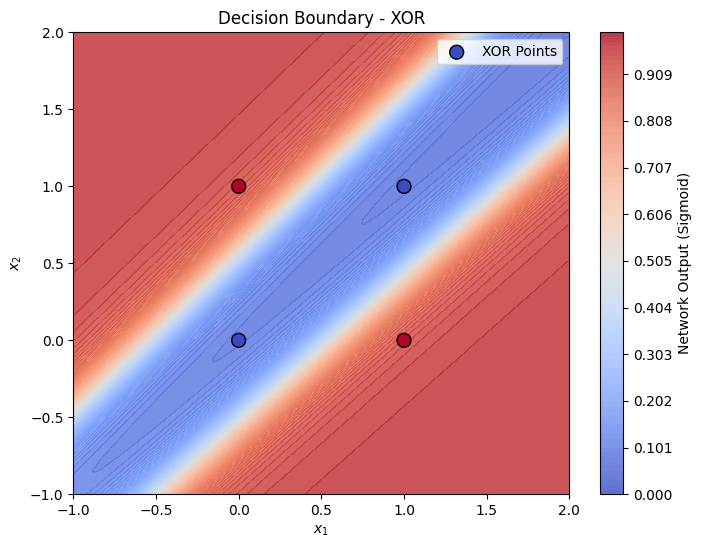

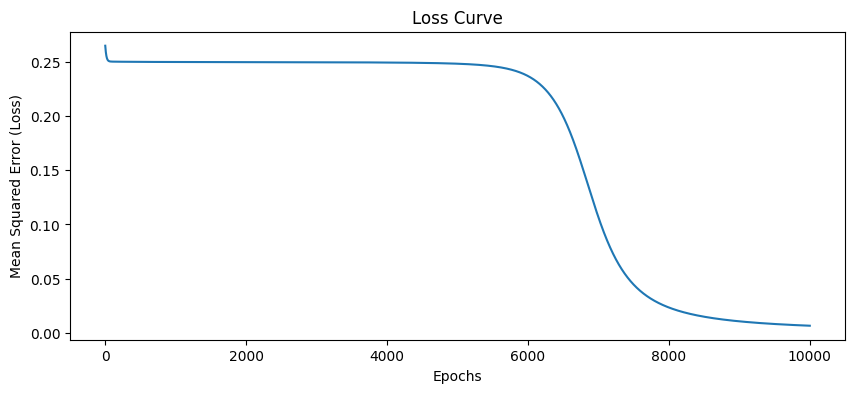

In [ ]:
# Creating a Perceptron for XOR:

print('CREATING A PERCEPTRON FOR XOR')
print('')

# Activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Class for the Multilayer Neural Network
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.1, epochs=10000):
        self.input_size = input_size  # Number of input neurons
        self.hidden_size = hidden_size  # Number of hidden neurons
        self.output_size = output_size  # Number of output neurons
        self.learning_rate = learning_rate  # Learning rate for weight updates
        self.epochs = epochs  # Number of training epochs

        # Initialize the weights and biases for input-hidden and hidden-output layers
        self.weights_input_hidden = np.random.uniform(-1, 1, (input_size, hidden_size))
        self.bias_hidden = np.zeros((1, hidden_size))  # Bias for hidden layer
        self.weights_hidden_output = np.random.uniform(-1, 1, (hidden_size, output_size))
        self.bias_output = np.zeros((1, output_size))  # Bias for output layer

        self.losses = []  # To store the loss at each epoch

    def forward(self, X):
        # Forward propagation step
        self.hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = sigmoid(self.hidden_input)  # Activation function for hidden layer
        self.output_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.output = sigmoid(self.output_input)  # Activation function for output layer
        return self.output

    def backward(self, X, y, output):
        # Calculate the error
        error = y - output
        loss = np.mean(np.square(error))  # Mean squared error
        self.losses.append(loss)  # Store the loss for plotting later

        # Gradients for output layer
        output_gradient = error * sigmoid_derivative(output)  # Derivative of sigmoid for output layer
        hidden_error = np.dot(output_gradient, self.weights_hidden_output.T)  # Error propagated to the hidden layer

        # Gradients for hidden layer
        hidden_gradient = hidden_error * sigmoid_derivative(self.hidden_output)  # Derivative of sigmoid for hidden layer

        # Update weights and biases using gradient descent
        self.weights_hidden_output += self.learning_rate * np.dot(self.hidden_output.T, output_gradient)
        self.bias_output += self.learning_rate * np.sum(output_gradient, axis=0, keepdims=True)
        self.weights_input_hidden += self.learning_rate * np.dot(X.T, hidden_gradient)
        self.bias_hidden += self.learning_rate * np.sum(hidden_gradient, axis=0, keepdims=True)

    def train(self, X, y):
        # Training the model for a set number of epochs
        for _ in range(self.epochs):
            output = self.forward(X)  # Perform forward propagation
            self.backward(X, y, output)  # Perform backward propagation (weight updates)

    def predict(self, X):
        # Predict the output for given inputs
        output = self.forward(X)
        return np.round(output)  # Round the output to 0 or 1 (binary classification)

# XOR problem (input and expected output)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Input data
y = np.array([[0], [1], [1], [0]])  # Expected output (XOR logic)

# Initialize the neural network with 2 input neurons, 2 hidden neurons, and 1 output neuron
nn = NeuralNetwork(input_size=2, hidden_size=2, output_size=1, learning_rate=0.1, epochs=10000)

# Train the neural network on the XOR data
nn.train(X, y)

# Make predictions
predictions = nn.predict(X)
print("Predictions for XOR:")
for inp, pred in zip(X, predictions):
    print(f"Input: {inp} -> Predicted output: {int(pred)}")

# Plotting the XOR points and the decision boundary
x1_range = np.linspace(-1, 2, 100)  # Adjusting range from -1 to 2
x2_range = np.linspace(-1, 2, 100)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)  # Create a grid of points
inputs = np.c_[x1_grid.ravel(), x2_grid.ravel()]  # Flatten grid to get input pairs

# Get the network's outputs for each point on the grid
outputs = nn.forward(inputs).reshape(x1_grid.shape)

# Plotting the results
plt.figure(figsize=(8, 6))
plt.contourf(x1_grid, x2_grid, outputs, levels=np.linspace(0, 1, 100), cmap="coolwarm", alpha=0.8)
plt.colorbar(label="Network Output (Sigmoid)")
plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), edgecolors='k', cmap="coolwarm", s=100, label="XOR Points")
plt.title("Decision Boundary - XOR")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.xlim(-1, 2)  # Adjust x-axis limits
plt.ylim(-1, 2)  # Adjust y-axis limits
plt.legend()
plt.show()

# Plotting the loss curve (error)
plt.figure(figsize=(10, 4))
plt.plot(nn.losses)  # Plot the loss over epochs
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error (Loss)")
plt.show()


### Summary of the network configuration:

- Input layer: 2 neurons
- Hidden layer: 2 neurons
- Output layer: 1 neuron
- Activation function: Sigmoid in all layers
- Training for 10,000 epochs with a learning rate of 0.1




---